# Image Classification Project

## Problem Statement: 
Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. 

The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 
This task is divided into two phases: Data Collection and Mode Building. 


### Importing Necessory libraries

In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from keras.models import Sequential
from keras import backend as K

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Data
Here I am loading the data from folder containing images. After loading the folder I will shuffle the data.

In [2]:
#loading data into a file directory
from random import shuffle
from glob import glob
image_file = glob(r"C:\Users\ABHINANDAN\Desktop\amazon images\*.jpg")
shuffle(image_file)

In [3]:
#lets check the first 10 image files
image_file[0:10]

['C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Jeans_1670.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Saree_1327.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Trouser_373.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Jeans_2425.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Jeans_1591.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Jeans_558.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Jeans_2051.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Trouser_1232.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Saree_406.jpg',
 'C:\\Users\\ABHINANDAN\\Desktop\\amazon images\\Saree_981.jpg']

### After loading image files I am creating a list with images and another with image labels. Here I am taking labels from the respective file names by using split function,

In [4]:
images = []
img_label = []
shape = (200,200)

for filename in image_file:
    img = cv2.imread(filename)
    
    # Resize all images to a specific shape
    if img is None:
        print('Wrong file:', filename)
    else:
        img = cv2.resize(img,shape)
        images.append(img)
        # Spliting file names and storing the labels for image in list
        img_label.append(filename.split("images")[1].split('_')[0][1:])

Wrong file: C:\Users\ABHINANDAN\Desktop\amazon images\Jeans_2555.jpg


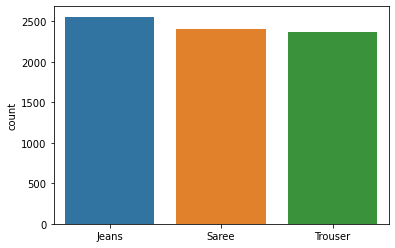

In [5]:
#lets check the labels
sns.countplot(img_label)
plt.show()

Looking at the above count plot it is clear that we are having nearly same number of images of each category. And the Jeans images are slightly more in number.

In [6]:
# Converting labels into One Hot encoded sparse matrix
img_label = pd.get_dummies(img_label).values

# Converting train_images to array
images = np.array(images)

In [7]:
#lets check the amount of data we have
len(images), len(img_label)

(7331, 7331)

Great we are having the data with 7331 images and their labels.

### Splitting the data into train and test

In [8]:
# Splitting Training data into train and validation dataset
x_train,x_test,y_train,y_test = train_test_split(images,img_label,test_size=0.25,random_state=1)

In [9]:
#lets check the shape of training and testing set
print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Testing images:", x_test.shape)
print("Testing labels:", y_test.shape)


Training images: (5498, 200, 200, 3)
Training labels: (5498, 3)
Testing images: (1833, 200, 200, 3)
Testing labels: (1833, 3)


[1 0 0]


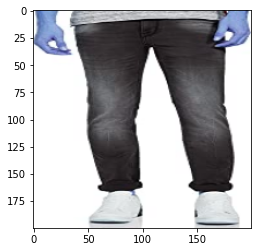

In [10]:
# Visualizing Training data
print(img_label[0])
plt.imshow(images[0])
plt.show()

Above figure is showing our first image which is a image of saree along with its label.

In [11]:
img_label

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

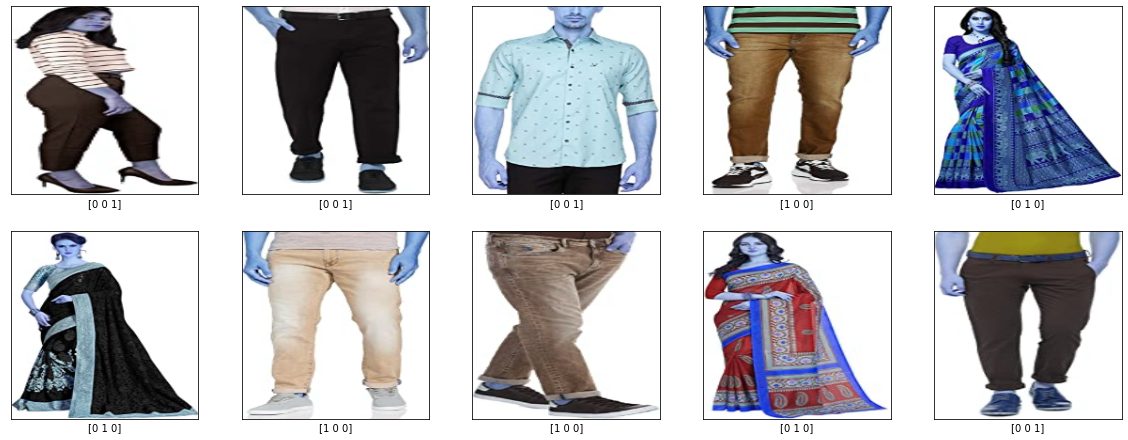

In [12]:
#Lets visualize some more images along with their labels
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In above figure we can observe different images of all the three classes with their labels.

## Model Building and Evaluation

To check the evaluation metrics along with the model I am defining functions to calculate Recall, Precision and F1_scores which will give better understanding about model performance.

In [13]:
#defining functions to calculate recall, precision and f1_scores
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


## Model-1

In [14]:
# Creating a Sequential model
model= Sequential()
#first convolution layer
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3)))
#second convolution layer
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#third convolution layer
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#fourth convolution layer
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())
#adding fully connected layers
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

* For our first model I am using a sequential model with four convolution layers along with __tanh__ activation function. And two Dense layers.
* I have used __adam__ optimizer for all models as it is giving me better performances.
* For evaluation I am checking accuracy, loss, F1_score, precision and recall

In [15]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [16]:
# Training the model
history = model.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
110/110 [==============================] - 550s 5s/step - loss: 1.0126 - accuracy: 0.8007 - f1_score: 0.8007 - precision_m: 0.8032 - recall_m: 0.7985 - val_loss: 0.2960 - val_accuracy: 0.8745 - val_f1_score: 0.8747 - val_precision_m: 0.8779 - val_recall_m: 0.8716
Epoch 2/3
110/110 [==============================] - 507s 5s/step - loss: 0.3276 - accuracy: 0.8627 - f1_score: 0.8643 - precision_m: 0.8689 - recall_m: 0.8598 - val_loss: 0.2441 - val_accuracy: 0.9089 - val_f1_score: 0.9090 - val_precision_m: 0.9108 - val_recall_m: 0.9073
Epoch 3/3
110/110 [==============================] - 484s 4s/step - loss: 0.2434 - accuracy: 0.9047 - f1_score: 0.9040 - precision_m: 0.9068 - recall_m: 0.9014 - val_loss: 0.5407 - val_accuracy: 0.7703 - val_f1_score: 0.7690 - val_precision_m: 0.7712 - val_recall_m: 0.7669


## Model-2

In [17]:
# Creating second Sequential model
model2= Sequential()
#first convolution layer
model2.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
#second convolution layer
model2.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
#third convolution layer
model2.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
#fourth convolution layer
model2.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

model2.add(Flatten())
#adding fully connected layers
model2.add(Dense(100,activation='relu'))
model2.add(Dense(3,activation = 'softmax'))
    
model2.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

* For our second model I am using a sequential model with four convolution layers along with __relu__ activation function. And two Dense layers.

In [18]:
# Model Summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 30)       

In [19]:
# Training the model
history2 = model2.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
110/110 [==============================] - 489s 4s/step - loss: 31.9103 - accuracy: 0.7113 - f1_score: 0.6897 - precision_m: 0.7446 - recall_m: 0.6465 - val_loss: 0.4384 - val_accuracy: 0.8303 - val_f1_score: 0.8217 - val_precision_m: 0.8609 - val_recall_m: 0.7869
Epoch 2/3
110/110 [==============================] - 491s 4s/step - loss: 0.3067 - accuracy: 0.8870 - f1_score: 0.8844 - precision_m: 0.9006 - recall_m: 0.8692 - val_loss: 0.4605 - val_accuracy: 0.8592 - val_f1_score: 0.8591 - val_precision_m: 0.8693 - val_recall_m: 0.8494
Epoch 3/3
110/110 [==============================] - 464s 4s/step - loss: 0.1570 - accuracy: 0.9429 - f1_score: 0.9413 - precision_m: 0.9475 - recall_m: 0.9354 - val_loss: 0.3132 - val_accuracy: 0.8958 - val_f1_score: 0.8951 - val_precision_m: 0.9004 - val_recall_m: 0.8900


## Model-3

In [20]:
# Creating a Sequential model
model3= Sequential()
#first convolution layer
model3.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh',kernel_initializer='he_uniform', 
                  input_shape=(200,200,3)))
#second convolution layer
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
#third convolution layer
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
#fourth convolution layer
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model3.add(Flatten())

#adding fully connected layers
model3.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(3,activation = 'softmax'))
    
model3.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

* For third model I am using a sequential model with four convolution layers along with __tanh__ activation function. And two Dense layers.
* Here I have added kernal_initializer as "he_uniform" at first convolution layer and at first Dense layer.

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 30)       

In [22]:
# Training the model
history3 = model3.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
110/110 [==============================] - 481s 4s/step - loss: 1.3384 - accuracy: 0.8105 - f1_score: 0.8068 - precision_m: 0.8093 - recall_m: 0.8045 - val_loss: 0.2782 - val_accuracy: 0.8816 - val_f1_score: 0.8826 - val_precision_m: 0.8862 - val_recall_m: 0.8792
Epoch 2/3
110/110 [==============================] - 481s 4s/step - loss: 0.2647 - accuracy: 0.8872 - f1_score: 0.8870 - precision_m: 0.8902 - recall_m: 0.8839 - val_loss: 0.2765 - val_accuracy: 0.8833 - val_f1_score: 0.8820 - val_precision_m: 0.8847 - val_recall_m: 0.8794
Epoch 3/3
110/110 [==============================] - 486s 4s/step - loss: 0.2050 - accuracy: 0.9207 - f1_score: 0.9203 - precision_m: 0.9232 - recall_m: 0.9174 - val_loss: 0.2285 - val_accuracy: 0.9073 - val_f1_score: 0.9068 - val_precision_m: 0.9100 - val_recall_m: 0.9038


## Model-4

In [23]:
# Creating a Sequential model
model4= Sequential()
#first convolution layer
model4.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu',kernel_initializer='he_uniform', input_shape=(200,200,3)))
#second convolution layer
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#third convolution layer
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#fourth convolution layer
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

model4.add(Flatten())

#adding fully connected layers
model4.add(Dense(100,activation='relu', kernel_initializer='he_uniform'))
model4.add(Dense(3,activation = 'softmax'))

model4.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

* For our first model I am using a sequential model with four convolution layers along with __relu__ activation function. And two Dense layers.
* Here I have added  kernal_initializer as "he_uniform" at first convolution layer and at first Dense layer.

In [24]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 30)       

In [25]:
# Training the model
history4 = model4.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
110/110 [==============================] - 454s 4s/step - loss: 54.1179 - accuracy: 0.7368 - f1_score: 0.7210 - precision_m: 0.7729 - recall_m: 0.6787 - val_loss: 0.4528 - val_accuracy: 0.8456 - val_f1_score: 0.8425 - val_precision_m: 0.8697 - val_recall_m: 0.8175
Epoch 2/3
110/110 [==============================] - 455s 4s/step - loss: 0.3453 - accuracy: 0.8887 - f1_score: 0.8815 - precision_m: 0.9083 - recall_m: 0.8571 - val_loss: 0.5430 - val_accuracy: 0.8614 - val_f1_score: 0.8634 - val_precision_m: 0.8798 - val_recall_m: 0.8480
Epoch 3/3
110/110 [==============================] - 452s 4s/step - loss: 0.2046 - accuracy: 0.9323 - f1_score: 0.9306 - precision_m: 0.9457 - recall_m: 0.9165 - val_loss: 0.5474 - val_accuracy: 0.8407 - val_f1_score: 0.8278 - val_precision_m: 0.8599 - val_recall_m: 0.7986


## Model-5

In [26]:
# Creating a Sequential model
model5= Sequential()
#first convolution layer
model5.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh',kernel_initializer='uniform', input_shape=(200,200,3)))
#second convolution layer
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(MaxPool2D(2,2))
#third convolution layer
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(MaxPool2D(2,2))
#fourth convolution layer
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model5.add(Flatten())

#adding fully connected layers
model5.add(Dense(100,activation='relu',kernel_initializer='uniform'))
model5.add(Dense(3,activation = 'softmax'))
    
model5.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

For fifth model I have just replaced kernel_initializer as "uniform" in 3rd model.

In [27]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 46, 46, 30)       

In [28]:
# Training the model
history5 = model5.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
110/110 [==============================] - 477s 4s/step - loss: 2.5950 - accuracy: 0.7646 - f1_score: 0.7643 - precision_m: 0.7679 - recall_m: 0.7609 - val_loss: 0.4330 - val_accuracy: 0.8041 - val_f1_score: 0.8044 - val_precision_m: 0.8078 - val_recall_m: 0.8010
Epoch 2/3
110/110 [==============================] - 473s 4s/step - loss: 0.3192 - accuracy: 0.8710 - f1_score: 0.8709 - precision_m: 0.8748 - recall_m: 0.8672 - val_loss: 0.2801 - val_accuracy: 0.8860 - val_f1_score: 0.8874 - val_precision_m: 0.8916 - val_recall_m: 0.8832
Epoch 3/3
110/110 [==============================] - 495s 5s/step - loss: 0.3007 - accuracy: 0.8730 - f1_score: 0.8732 - precision_m: 0.8769 - recall_m: 0.8696 - val_loss: 0.3229 - val_accuracy: 0.8522 - val_f1_score: 0.8519 - val_precision_m: 0.8551 - val_recall_m: 0.8489


### In above five models model-3 is giving better performance. Hence I am selecting model3 as our final model

Now I am plotting graphs for model history

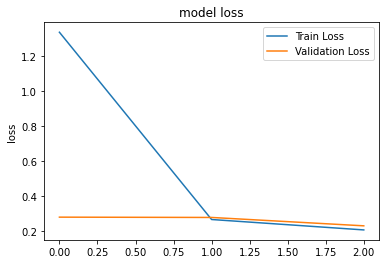

In [29]:
# summarize history for loss
plt.plot(model3.history.history['loss'],label="Train Loss")
plt.plot(model3.history.history['val_loss'],label="Validation Loss")
plt.title('model loss')
plt.ylabel('loss')
plt.legend()
plt.show()

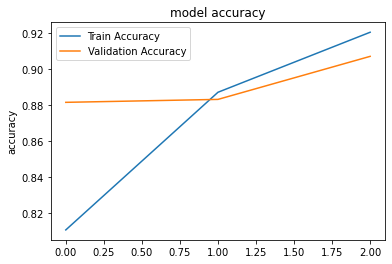

In [30]:
# summarize history for accuracy
plt.plot(model3.history.history['accuracy'],label="Train Accuracy")
plt.plot(model3.history.history['val_accuracy'],label="Validation Accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.show()

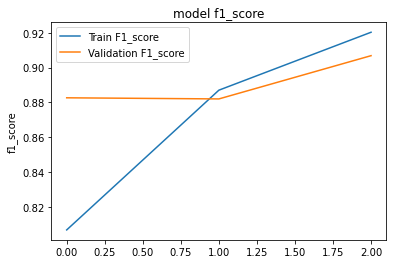

In [31]:
# summarize history for F1_score
plt.plot(model3.history.history['f1_score'],label="Train F1_score")
plt.plot(model3.history.history['val_f1_score'],label="Validation F1_score")
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.legend()
plt.show()

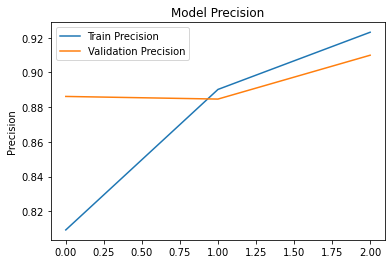

In [32]:
# summarize history for F1_score
plt.plot(model3.history.history['precision_m'],label="Train Precision")
plt.plot(model3.history.history['val_precision_m'],label="Validation Precision")
plt.title('Model Precision')
plt.ylabel('Precision')
plt.legend()
plt.show()

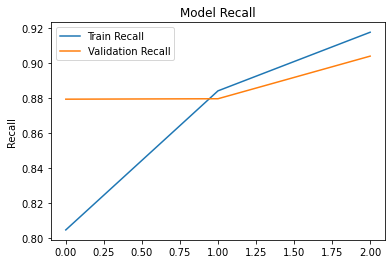

In [33]:
# summarize history for F1_score
plt.plot(model3.history.history['recall_m'],label="Train Recall")
plt.plot(model3.history.history['val_recall_m'],label="Validation Recall")
plt.title('Model Recall')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [34]:
# Evaluating model on validation data
evaluate = model3.evaluate(x_test,y_test)
print(evaluate)

58/58 [==============================] - 42s 730ms/step - loss: 0.2285 - accuracy: 0.9073 - f1_score: 0.9074 - precision_m: 0.9112 - recall_m: 0.9038
[0.22847656905651093, 0.9072558879852295, 0.9073639512062073, 0.911165177822113, 0.9037954807281494]


## Testing the predictions

In [35]:
# Testing predictions and the actual label
checkImage = x_test[0:1]
checklabel = y_test[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'Jeans',1:'Saree',2:'Trouser'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[1 0 0]]
Predicted :-  Jeans


In [36]:
# Testing predictions and the actual label
checkImage = x_test[50:51]
checklabel = y_test[50:51]

predict = model.predict(np.array(checkImage))

output = { 0:'Jeans',1:'Saree',2:'Trouser'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[0 1 0]]
Predicted :-  Saree


Great, We can see our model is predicting the images accurately.

## Model Saving

In [37]:
#saving the model
model3.save("Image_Classifier.h5")